In [0]:
!wget https://storage.googleapis.com/nicksdemobucket/titanic-train.csv

--2019-03-28 13:31:26--  https://storage.googleapis.com/nicksdemobucket/titanic-train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [application/octet-stream]
Saving to: ‘titanic-train.csv.4’

titanic-train.csv.4 100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2019-03-28 13:31:26 (93.7 MB/s) - ‘titanic-train.csv.4’ saved [61194/61194]



In [0]:
import pandas as pd
df = pd.read_csv('titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df = df.replace(["male", "female"], [0,1])
df = df.replace(["S", "C", "Q"], [0,1,2])
df= df.fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0.0


In [0]:
list_drop = ['Survived', 'Name','Ticket','Cabin']
features = df.drop(list_drop,axis = 1).values
labels = pd.get_dummies(df[['Survived']]).values
print(features.shape,labels.shape)

(891, 8) (891, 1)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add(Dense(4, input_shape=(8,), activation='relu'))
model.add(Dense(12,activation = 'sigmoid'))
model.add(Dense(2,activation = 'sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
h = model.fit(features, labels, epochs=300,batch_size = 30)

Epoch 1/300
891/891 [==============================] - 0s 259us/sample - loss: 0.9811 - acc: 0.6162
Epoch 2/300
891/891 [==============================] - 0s 44us/sample - loss: 0.7883 - acc: 0.6162
Epoch 3/300
891/891 [==============================] - 0s 47us/sample - loss: 0.7007 - acc: 0.6162
Epoch 4/300
891/891 [==============================] - 0s 53us/sample - loss: 0.6707 - acc: 0.6162
Epoch 5/300
891/891 [==============================] - 0s 55us/sample - loss: 0.6666 - acc: 0.6162
Epoch 6/300
891/891 [==============================] - 0s 57us/sample - loss: 0.6624 - acc: 0.6162
Epoch 7/300
891/891 [==============================] - 0s 58us/sample - loss: 0.6609 - acc: 0.6162
Epoch 8/300
891/891 [==============================] - 0s 51us/sample - loss: 0.6582 - acc: 0.6162
Epoch 9/300
891/891 [==============================] - 0s 54us/sample - loss: 0.6569 - acc: 0.6162
Epoch 10/300
891/891 [==============================] - 0s 53us/sample - loss: 0.6552 - acc: 0.6162
Epoch 11

In [0]:
h.history.keys()

dict_keys(['loss', 'acc'])

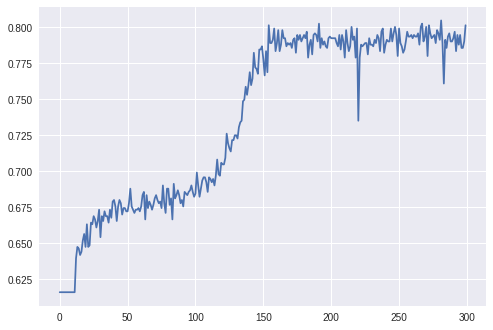

In [0]:
import matplotlib.pyplot as plt
plt.plot(h.history['acc'])